In [ ]:
# Import dependencies
import pandas as pd
import numpy as np
import requests
from PIL import Image
import io
import os
import pickle

In [ ]:
# THIS IS ONLY TO BE USED IF THE GOOGLE DRIVE IS NOT MOUNTE ALREADY
# This will prompt for authorization.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


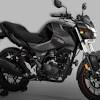

In [ ]:
# View image as a test
from IPython.display import Image, display

img_path = "/content/drive/MyDrive/Colab Notebooks/Final Project/Bike2.jpeg"

#!ls "/content/drive/MyDrive/Colab Notebooks/Final Project/bike_test/Car-Bike-Dataset/Bike (1).jpeg"

display(Image(filename=img_path))

# Import the file with the bike images and process it into a dataframe

In [ ]:
# IMPORT THE BIKE FILE NAMES

# Specify the directory where your bike images are stored
bike_directory = '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Bike'

# List all files in the directory
bike_image_names = os.listdir(bike_directory)

# Filter only .jpg, .png, and .jpeg files
bike_names_file = [f for f in bike_image_names if f.endswith(('.jpg', '.png','jpeg'))]

# Create a DataFrame from the list of file names
bike_names_file_df = pd.DataFrame(bike_names_file, columns=['File Name'])

print(bike_names_file_df)

            File Name
0     Bike (322).jpeg
1     Bike (328).jpeg
2     Bike (334).jpeg
3     Bike (343).jpeg
4      Bike (34).jpeg
...               ...
1994  Bike (327).jpeg
1995  Bike (316).jpeg
1996  Bike (318).jpeg
1997  Bike (324).jpeg
1998  Bike (313).jpeg

[1999 rows x 1 columns]


In [ ]:
# SORT THE FILE NAMES ALPHABETICALLY

# Sorting the DataFrame alphabetically by the 'File Name' column
bike_names_file_sorted_df = bike_names_file_df.sort_values(by='File Name')

# Resetting the index (optional)
bike_names_file_sorted_df = bike_names_file_sorted_df.reset_index(drop=True)

# Display the sorted DataFrame
print(bike_names_file_sorted_df)

             File Name
0        Bike (1).jpeg
1         Bike (1).jpg
2         Bike (1).png
3       Bike (10).jpeg
4        Bike (10).jpg
...                ...
1994  images (96).jpeg
1995  images (97).jpeg
1996  images (98).jpeg
1997  images (99).jpeg
1998       images.jpeg

[1999 rows x 1 columns]


In [ ]:
# ADD ANOTHER COLUMN WITH JUST THE VALUE OF BIKE
bike_names_file_sorted_df['Category'] = 'bike'
bike_names_file_sorted_df['Folder'] = '/Bike/'

print(bike_names_file_sorted_df)

             File Name Category  Folder
0        Bike (1).jpeg     bike  /Bike/
1         Bike (1).jpg     bike  /Bike/
2         Bike (1).png     bike  /Bike/
3       Bike (10).jpeg     bike  /Bike/
4        Bike (10).jpg     bike  /Bike/
...                ...      ...     ...
1994  images (96).jpeg     bike  /Bike/
1995  images (97).jpeg     bike  /Bike/
1996  images (98).jpeg     bike  /Bike/
1997  images (99).jpeg     bike  /Bike/
1998       images.jpeg     bike  /Bike/

[1999 rows x 3 columns]


# Import the file with the car images and process it into a dataframe

In [ ]:
# IMPORT THE CAR FILE NAMES

# Specify the directory where your car images are stored
car_directory = '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car'

# List all files in the directory
car_image_names = os.listdir(car_directory)

# Filter only .jpg, .png, and .jpeg files
car_names_file = [f for f in car_image_names if f.endswith(('.jpg', '.png','jpeg'))]

# Create a DataFrame from the list of file names
car_names_file_df = pd.DataFrame(car_names_file, columns=['File Name'])

print(car_names_file_df)

            File Name
0     Car (1881).jpeg
1     Car (1888).jpeg
2     Car (1897).jpeg
3     Car (1885).jpeg
4     Car (1884).jpeg
...               ...
1992  Car (1889).jpeg
1993  Car (1892).jpeg
1994  Car (1883).jpeg
1995  Car (1891).jpeg
1996  Car (1890).jpeg

[1997 rows x 1 columns]


In [ ]:
# SORT THE FILE NAMES ALPHABETICALLY

# Sorting the DataFrame alphabetically by the 'File Name' column
car_names_file_sorted_df = car_names_file_df.sort_values(by='File Name')

# Resetting the index (optional)
car_names_file_sorted_df = car_names_file_sorted_df.reset_index(drop=True)

# Display the sorted DataFrame
print(car_names_file_sorted_df)

           File Name
0       Car (1).jpeg
1        Car (1).jpg
2        Car (1).png
3      Car (10).jpeg
4       Car (10).jpg
...              ...
1992  Car (995).jpeg
1993  Car (996).jpeg
1994  Car (997).jpeg
1995  Car (998).jpeg
1996  Car (999).jpeg

[1997 rows x 1 columns]


In [ ]:
# ADD TWO COLUMN WITH JUST THE VALUE OF CAR AND /Car
car_names_file_sorted_df['Category'] = 'car'
car_names_file_sorted_df['Folder'] = '/Car/'

print(car_names_file_sorted_df)

           File Name Category Folder
0       Car (1).jpeg      car  /Car/
1        Car (1).jpg      car  /Car/
2        Car (1).png      car  /Car/
3      Car (10).jpeg      car  /Car/
4       Car (10).jpg      car  /Car/
...              ...      ...    ...
1992  Car (995).jpeg      car  /Car/
1993  Car (996).jpeg      car  /Car/
1994  Car (997).jpeg      car  /Car/
1995  Car (998).jpeg      car  /Car/
1996  Car (999).jpeg      car  /Car/

[1997 rows x 3 columns]


# Merge the Car and Bike files, upload the images, and create a pickle file

In [ ]:
# Merge the car and bike files
vehicles_df = pd.concat([car_names_file_sorted_df, bike_names_file_sorted_df], ignore_index=True)

print(vehicles_df)

             File Name Category  Folder
0         Car (1).jpeg      car   /Car/
1          Car (1).jpg      car   /Car/
2          Car (1).png      car   /Car/
3        Car (10).jpeg      car   /Car/
4         Car (10).jpg      car   /Car/
...                ...      ...     ...
3991  images (96).jpeg     bike  /Bike/
3992  images (97).jpeg     bike  /Bike/
3993  images (98).jpeg     bike  /Bike/
3994  images (99).jpeg     bike  /Bike/
3995       images.jpeg     bike  /Bike/

[3996 rows x 3 columns]


In [ ]:
# BUILD A LIST OF IMAGES USING A FOR LOOP

# Define the base_url
base_url = '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset'

# Create an empty list for the url's
img_urls = []

# Loop through the DataFrame and build and append the full image urls
for i in range(len(vehicles_df)):
    folder_name = vehicles_df.iloc[i,2]
    image_name = vehicles_df.iloc[i,0]
    img_urls.append(base_url + folder_name + image_name)

# View the first five image paths
img_urls[:5]

['/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (1).jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (1).jpg',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (1).png',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (10).jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (10).jpg']

In [ ]:
# View the bottom five image paths
img_urls[-5:]

['/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Bike/images (96).jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Bike/images (97).jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Bike/images (98).jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Bike/images (99).jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Bike/images.jpeg']

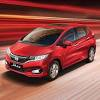

In [ ]:
# View image as a test
img = img_urls[0:1]
img_path = img[0]

display(Image(filename=img_path))

0/3996: Successfully imported /content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (1).jpeg
1/3996: Successfully imported /content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (1).jpg
2/3996: Successfully imported /content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (1).png
3/3996: Successfully imported /content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (10).jpeg
4/3996: Successfully imported /content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (10).jpg
5/3996: Successfully imported /content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (100).jpeg
6/3996: Successfully imported /content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (1000).jpeg
7/3996: Successfully imported /content/drive/MyDrive/Colab Notebooks/Final Project/Car-Bike-Dataset/Car/Car (1001).jpeg
8/3996: Successfully imported /content/drive/MyDrive/Cola

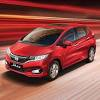

In [ ]:
# Import dependency
from PIL import Image

# Create an empty list for images
imgs = []

# Loop through ONLY THE FIRST 20 image_urls to open and append each image
num_imgs = len(img_urls)

for i in range(num_imgs):
    img_url = img_urls[i]

    try:
        # Open and read the image file
        with open(img_url, 'rb') as file:
            response = file.read()

        # Open the image using PIL
        image = Image.open(io.BytesIO(response))

        # Append the image to the imgs list
        imgs.append(image)

        #print(f"Successfully imported {img_url}")
        print(f"{i}/{num_imgs}: Successfully imported {img_url}")

    except Exception as e:
        print(f"{i}/{num_imgs}: Error importing {img_url}: {str(e)}")

# View the first image to confirm (if any images were successfully loaded)
if imgs:
    display(imgs[0])  # This will display the image in Jupyter/Colab
else:
    print("No images were successfully loaded.")

In [ ]:
# Open a new file named 'vehicles.pkl' with write permission
with open('/content/drive/MyDrive/Colab Notebooks/Final Project/vehicle.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(imgs, file)

# Store the vehicles_df dataframe as a csv file

In [ ]:
vehicles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/vehicles_df.csv', index=False)